### Supervised Learning for Customer Revenue Prediction

### Reading Data

In [60]:
#Importing Combined Dataset - Olist.csv
olist_data = pd.read_csv('olist.csv')
olist_data.head(10)

/Users/SahilSachdev/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,17,18,31,32,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,...,product_height_cm,product_width_cm,zip_code_prefix_y,seller_city,seller_state,product_category_name_english,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y
0,0.0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,...,8.0,13.0,9350.0,maua,SP,housewares,-23.680114,-46.452454,maua,SP
1,1.0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,...,8.0,13.0,9350.0,maua,SP,housewares,-23.680114,-46.452454,maua,SP
2,2.0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,...,8.0,13.0,9350.0,maua,SP,housewares,-23.680114,-46.452454,maua,SP
3,3.0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,...,13.0,19.0,31570.0,belo horizonte,SP,perfumery,-19.810119,-43.984727,belo horizonte,MG
4,4.0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,...,19.0,21.0,14840.0,guariba,SP,auto,-21.362358,-48.232976,guariba,SP
5,5.0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,...,10.0,20.0,31842.0,belo horizonte,MG,pet_shop,-19.840168,-43.923299,belo horizonte,MG
6,6.0,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,...,15.0,15.0,8752.0,mogi das cruzes,SP,stationery,-23.551707,-46.260979,mogi das cruzes,SP
7,7.0,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,89b738e70a1ce346db29a20fb2910161,...,10.0,65.0,7112.0,guarulhos,SP,auto,-23.465304,-46.511487,guarulhos,SP
8,8.0,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,07d67dd06ed5f88bef11ef6b464e79ae,...,16.0,17.0,12940.0,atibaia,SP,auto,-23.112774,-46.548885,atibaia,SP
9,9.0,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,fc4af8aea8ec3f1a3cd181d3d0cadbd5,...,35.0,15.0,13720.0,sao jose do rio pardo,SP,furniture_decor,-21.592175,-46.893896,são josé do rio pardo,SP


In [61]:
#Viewing Olist Dataset
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116584 entries, 0 to 116583
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     116581 non-null  float64
 1   order_id                       116584 non-null  object 
 2   customer_id                    116584 non-null  object 
 3   order_status                   116584 non-null  object 
 4   order_purchase_timestamp       116584 non-null  object 
 5   order_approved_at              116570 non-null  object 
 6   order_delivered_carrier_date   115371 non-null  object 
 7   order_delivered_customer_date  114069 non-null  object 
 8   order_estimated_delivery_date  116584 non-null  object 
 9   review_id                      116584 non-null  object 
 10  review_score                   116584 non-null  object 
 11  review_comment_title           13999 non-null   object 
 12  review_comment_message        

### Data Cleaning - Dropping Columns, Dropping NAs, Changing Data Types

In [62]:
# Dropping Columns - id columns (ex, review_id, customer_id, product_id, seller_id), date columnns (order_delivered_carrier_date, order_delivered_customer_date, etc), redundant (ex. zip_code_prefix, geolocation_lat/lng, geolocation_city, etc) and unnessary columns (seller_city, seller_state, payment_sequential, etc). 
olist_data = olist_data.drop(['review_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_comment_title', 'review_comment_message', 'Unnamed: 0', 'zip_code_prefix_x', 'zip_code_prefix_y', 'payment_sequential', 'product_category_name', 'review_creation_date', 'review_answer_timestamp', 'customer_unique_id', 'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x', 'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'freight_value', 'product_name_length', 'product_description_length', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_city', 'seller_state', 'geolocation_lat_y', 'geolocation_lng_y', 'geolocation_city_y', 'geolocation_state_y'], axis=1)

In [63]:
# Viewing Olist Data after dropping rows
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116584 entries, 0 to 116583
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       116584 non-null  object
 1   review_score                   116584 non-null  object
 2   payment_type                   116581 non-null  object
 3   payment_installments           116581 non-null  object
 4   payment_value                  116581 non-null  object
 5   customer_city                  116581 non-null  object
 6   customer_state                 116581 non-null  object
 7   price                          116581 non-null  object
 8   product_photos_qty             116581 non-null  object
 9   product_category_name_english  116578 non-null  object
dtypes: object(10)
memory usage: 8.9+ MB


In [64]:
# Viewing number of NA Values per feature
olist_data.isna().sum()

order_id                         0
review_score                     0
payment_type                     3
payment_installments             3
payment_value                    3
customer_city                    3
customer_state                   3
price                            3
product_photos_qty               3
product_category_name_english    6
dtype: int64

In [65]:
# Dropping the rows with NA Values from product_category_name_english and testing it that would remove all the other NA values.
olist_data=olist_data.dropna(subset=["product_category_name_english"])
olist_data.isna().sum()

order_id                         0
review_score                     0
payment_type                     0
payment_installments             0
payment_value                    0
customer_city                    0
customer_state                   0
price                            0
product_photos_qty               0
product_category_name_english    0
dtype: int64

In [66]:
# Now that all NA Values have been removed, converting Datatypes to Float
olist_data['review_score'] = olist_data['review_score'].astype(float)
olist_data['payment_installments'] = olist_data['payment_installments'].astype(float)
olist_data['payment_value'] = olist_data['payment_value'].astype(float)
olist_data['price'] = olist_data['price'].astype(float)
olist_data['product_photos_qty'] = olist_data['product_photos_qty'].astype(float)

In [67]:
# Converting payment_value to numeric
pd.to_numeric(olist_data['payment_value'], errors='coerce')

0          18.12
1           2.00
2          18.59
3         141.46
4         179.12
           ...  
116579    195.00
116580    271.01
116581    441.16
116582    441.16
116583     86.86
Name: payment_value, Length: 116578, dtype: float64

In [68]:
# Confirming Rows Above Converted to Float and Viewing Data
olist_data.describe()

,review_score,payment_installments,payment_value,price,product_photos_qty
count,116578.000000,116578.000000,116578.000000,116578.000000,116578.000000
mean,4.017516,2.949630,172.911469,120.752669,2.204996
std,1.397870,2.783815,267.625852,183.850525,1.717424
min,1.000000,0.000000,0.000000,0.850000,1.000000
25%,4.000000,1.000000,61.000000,39.900000,1.000000
50%,5.000000,2.000000,108.190000,74.900000,1.000000
75%,5.000000,4.000000,189.720000,134.900000,3.000000
max,5.000000,24.000000,13664.080000,6735.000000,20.000000


### Describing Individual Columns with Object Datatype to See Unique Values

In [69]:
# payment_type feature has 4 unique values
olist_data['payment_type'].describe()

count          116578
unique              4
top       credit_card
freq            86011
Name: payment_type, dtype: object

In [70]:
# payment_type feature
olist_data['payment_type'].value_counts()

credit_card    86011
boleto         22690
voucher         6211
debit_card      1666
Name: payment_type, dtype: int64

In [71]:
olist_data['customer_state'].describe()

count     116578
unique        27
top           SP
freq       49132
Name: customer_state, dtype: object

In [72]:
olist_data['product_category_name_english'].describe()

count             116578
unique                71
top       bed_bath_table
freq               11990
Name: product_category_name_english, dtype: object

In [73]:
olist_data['payment_installments'].describe()

count    116578.000000
mean          2.949630
std           2.783815
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [74]:
olist_data['payment_installments'].value_counts()

1.0     58028
2.0     13515
3.0     11653
4.0      7926
10.0     6867
5.0      5982
8.0      5055
6.0      4587
7.0      1804
9.0       724
12.0      166
15.0       93
18.0       38
24.0       34
11.0       25
20.0       21
13.0       19
14.0       16
16.0        7
17.0        7
21.0        6
0.0         3
22.0        1
23.0        1
Name: payment_installments, dtype: int64

In [75]:
#Final Data Check 
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116578 entries, 0 to 116583
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116578 non-null  object 
 1   review_score                   116578 non-null  float64
 2   payment_type                   116578 non-null  object 
 3   payment_installments           116578 non-null  float64
 4   payment_value                  116578 non-null  float64
 5   customer_city                  116578 non-null  object 
 6   customer_state                 116578 non-null  object 
 7   price                          116578 non-null  float64
 8   product_photos_qty             116578 non-null  float64
 9   product_category_name_english  116578 non-null  object 
dtypes: float64(5), object(5)
memory usage: 9.8+ MB


In [76]:
#Creating new column - totalpayment_value (Target) - aggregating individual product payment_value based on order_id so that totalpayment_value is the total value of the order
olist_data['totalpayment_value'] = olist_data['payment_value'].groupby(olist_data['order_id']).transform('sum')

In [77]:
#  Viewing Remaining data
olist_data.head(20)

,order_id,review_score,payment_type,payment_installments,payment_value,customer_city,customer_state,price,product_photos_qty,product_category_name_english,totalpayment_value
0,e481f51cbdc54678b7cc49136f2d6af7,4.0,credit_card,1.0,18.12,sao paulo,SP,29.99,4.0,housewares,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,4.0,voucher,1.0,2.00,sao paulo,SP,29.99,4.0,housewares,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,4.0,voucher,1.0,18.59,sao paulo,SP,29.99,4.0,housewares,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,4.0,boleto,1.0,141.46,barreiras,BA,118.70,1.0,perfumery,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,5.0,credit_card,3.0,179.12,vianopolis,GO,159.90,1.0,auto,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,5.0,credit_card,1.0,72.20,sao goncalo do amarante,RN,45.00,3.0,pet_shop,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,5.0,credit_card,1.0,28.62,santo andre,SP,19.90,4.0,stationery,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,4.0,credit_card,6.0,175.26,congonhinhas,PR,147.90,1.0,auto,175.26
8,6514b8ad8028c9f2cc2374ded245783f,5.0,credit_card,3.0,75.16,nilopolis,RJ,59.99,1.0,auto,75.16
9,76c6e866289321a7c93b82b54852dc33,1.0,boleto,1.0,35.95,faxinalzinho,RS,19.90,2.0,furniture_decor,35.95


In [78]:
# Dropping Duplicate Rows based on order_id, resulting in 1 row per order. Applying attributes of highest product value (first row per order) to each remaining order_id.  This results in manipulating our dataset to be based on an order-level rows rather than product-purcahsed level data.
import pandas as pd
import numpy as np
olist_data = olist_data.drop_duplicates(subset='order_id', keep="first")

In [79]:
# Now that we have a totalpayment_value, we can drop the redundant product level features including  
olist_data = olist_data.drop(['price', 'payment_value', 'order_id'], axis=1)

In [80]:
# Viewing Olist Data - Structured on Order Level
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97253 entries, 0 to 116583
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_score                   97253 non-null  float64
 1   payment_type                   97253 non-null  object 
 2   payment_installments           97253 non-null  float64
 3   customer_city                  97253 non-null  object 
 4   customer_state                 97253 non-null  object 
 5   product_photos_qty             97253 non-null  float64
 6   product_category_name_english  97253 non-null  object 
 7   totalpayment_value             97253 non-null  float64
dtypes: float64(4), object(4)
memory usage: 6.7+ MB


### Plotting Features and Correlation Matrix 

<IPython.core.display.Javascript object>

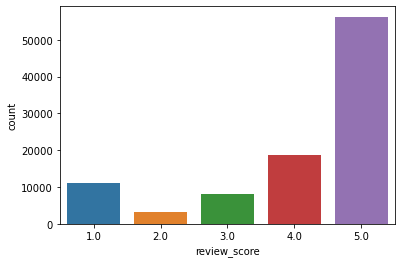

In [81]:
sns.countplot(x='review_score', data = olist_data)

<IPython.core.display.Javascript object>

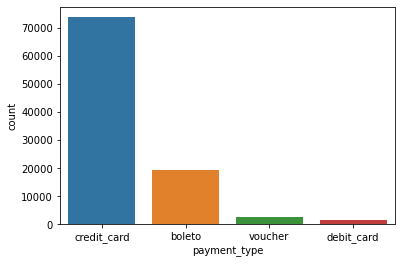

In [82]:
sns.countplot(x='payment_type', data = olist_data)

<IPython.core.display.Javascript object>

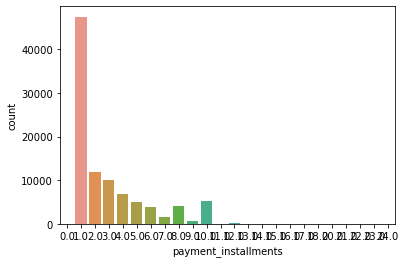

In [83]:
sns.countplot(x='payment_installments', data = olist_data)

<IPython.core.display.Javascript object>

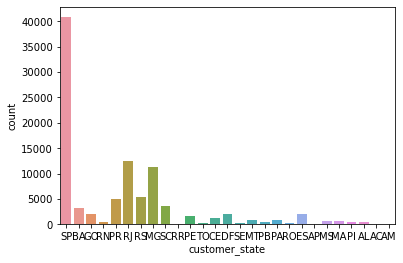

In [84]:
sns.countplot(x='customer_state', data = olist_data)

<IPython.core.display.Javascript object>

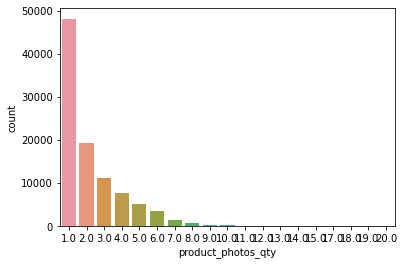

In [85]:
sns.countplot(x='product_photos_qty', data = olist_data)

<IPython.core.display.Javascript object>

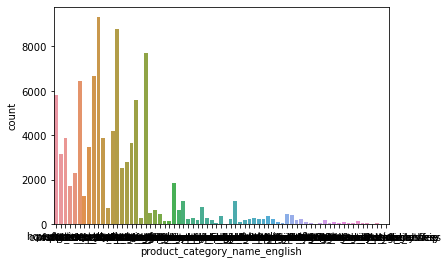

In [86]:
sns.countplot(x='product_category_name_english', data = olist_data)

<IPython.core.display.Javascript object>

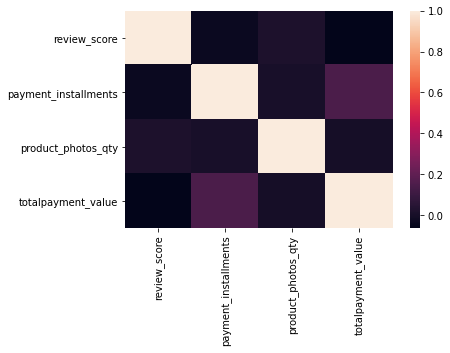

In [87]:
# Creating and Printing the Correlation Matrix
sns.heatmap(olist_data.corr())

In [88]:
olist_data.head()

,review_score,payment_type,payment_installments,customer_city,customer_state,product_photos_qty,product_category_name_english,totalpayment_value
0,4.0,credit_card,1.0,sao paulo,SP,4.0,housewares,38.71
3,4.0,boleto,1.0,barreiras,BA,1.0,perfumery,141.46
4,5.0,credit_card,3.0,vianopolis,GO,1.0,auto,179.12
5,5.0,credit_card,1.0,sao goncalo do amarante,RN,3.0,pet_shop,72.20
6,5.0,credit_card,1.0,santo andre,SP,4.0,stationery,28.62


#### As we can see here, we have our final Olist dataset before creating dummies and running the test/train split to prepare ourselves for running the predictions using multiple regression algorithms (ex. randomforest, xgboost, adaboost). Notice that this final dataset only includes product and order level data. We will be predicting totalpayment_value per order by using product and order level data. 

### Creating Dummies and Test/Train Split 

In [89]:
# Converting Categorial Values via Dummies
olist_data = pd.get_dummies(olist_data)

# Setting the Baselines - values for x and y, where y is only target value - totalpayment_value
X = olist_data.drop(labels=['totalpayment_value'], axis=1)
y = olist_data['totalpayment_value'].values
split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

print('X_train Data Shape:', X_train.shape)
print('X_test Data Shape:', X_test.shape)
print('y_train Data Shape:', y_train.shape)
print('y_test Data Shape:', y_test.shape)

<IPython.core.display.Javascript object>

X_train Data Shape: (77802, 4200)
X_test Data Shape: (19451, 4200)
y_train Data Shape: (77802,)
y_test Data Shape: (19451,)


### Running Predictions

In [95]:
# Now that Train and Test Split Created, Installing and Importing Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor

In [98]:
#Running XGB Algorithm without using UDF - example
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb_model = xgb_model.predict(X_test)
acc_xgb_model = round(xgb_model.score(X_test, y_test)*100, 2)
print(acc_xgb_model)

-7.47


In [99]:
# Printing MSE for XGBoost Algorithm
print("Mean Absolute error in predicting test data",mean_absolute_error(y_test,y_pred_xgb_model))

Mean Absolute error in predicting test data 157.08085933878232


In [100]:
#Running RandomForest Algorithm
random_forest = RandomForestRegressor(n_estimators = 100, n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test)*100, 2)
print(acc_random_forest) 

-12.36


In [101]:
# Printing MSE for RandomForest 
print("Mean Absolute error in predicting test data",mean_absolute_error(y_test,y_pred_random_forest))

Mean Absolute error in predicting test data 158.09632106920327


In [102]:
#Running AdaBoost Algorithm without using UDF - example
ada_model = AdaBoostRegressor(n_jobs=-1)
ada_model.fit(X_train, y_train)
y_pred_ada_model = ada_model.predict(X_test)
acc_ada_model = round(ada_model.score(X_test, y_test)*100, 2)
print(acc_ada_model)

-91.79


In [103]:
# Printing MSE for AdaBoost Algorithm
print("Mean Absolute error in predicting test data",mean_absolute_error(y_test,y_pred_ada_model))

Mean Absolute error in predicting test data 202.78249623677598


#### From the models and accuracy above, we can see we need to alter our data cleaning and processing process to improve the accuracy of these predictions. One thing we could do to improve the accuracy of our prediction models for Olist sellers to be able to predict potential revenue from customers is to include the results from our customer segmentation analysis. We can also improve this model by including more features and running a GridSearch to select the most important features. This would help increase the accuracy of our model. We plan to present this as a future analysis that can be conducted due to its ability to be benefits by including results from other parts of our business insights deep-dive including the customer segmentation results using RFM, which were more accurate than those conducted by Kmeans. 

In [104]:
# Collecting Top 20 Important Features as DF
imp_features = pd.Series(xgb_model.feature_importances_,index=X.columns).sort_values(ascending=False)
imp_features=pd.DataFrame(imp_features.reset_index())
imp_features.columns=['variable_name','importance']
imp_features = imp_features.head(20)

<IPython.core.display.Javascript object>

/Users/SahilSachdev/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

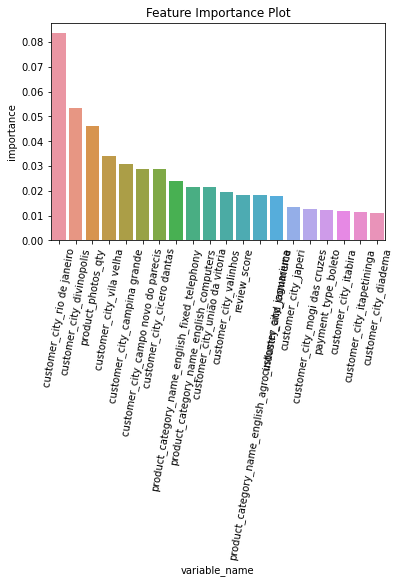

In [105]:
# Plotting Important Features in Bargraph
    sns.barplot('variable_name','importance',data=imp_features)
    plt.title('Feature Importance Plot')
    plt.xticks(rotation=80)